In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In questa esercitazione abbiamo utilizzato due metodi di campionamento diversi per studiare le caratteritiche statistiche del modello di Ising. La hamiltoniana del sistema è la seguente:
$$
H = -J\sum_{i=1}^N s_i s_{i+1}-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$
dove $s_i= \pm 1$ è il valore dello spin i-esimo, J è il valore dela costante di accoppiamento degli spin (in questo caso è unguale per ogni coppia di spin), h è il campo che ristente il singolo spin (anche in questo caso è costante per ogni $s_i$).
L'algoritmo campiona gli stati del sistema utilizzando il metodo Metropolis e il metodo di campionamento di Gibbs.

Il funzionamento è il seguente: si cambia lo stato di un singolo spin generando quindi un nuovo stato del sistema e in base al campionamento scelto (Gibbs o Metropolis) si determina se il sistema cambia configurazione o meno. Un singolo passo montecarlo consiste nel tentativo di cambiare ogni spin del sistema.

Delineamo velocemete di due metodi di campinamento. Nel metodo Metropolis si è scelta una probabilità di transizione $T(\nu|\mu)$ (con $\nu$ nuova configurazione di spin e $\mu$ configurazione di spin iniziale) simmetrica. Grazie a questa scelta, la probabilità di accetazione $A(\nu |\mu)$ della nuova configurazione risuta dipendente solo dalla differenza tra l'energia della due configurazioni. Nel caso di Metropolis: $A(\nu|\mu)=min[1,e^{-\beta(E_{\nu}-E_{\mu})}]$. Per quanto riguarda il metodo di campionamento di Gibbs, esso è un metodo per cui la probabilità di accettazione è 1, la probabilità di transizione è quindi $T(\nu|\mu)=\frac{p(\nu)}{p(\nu)+p(\mu)}$ dove $p(\nu)$ e $p(\mu)$  sono date dalla distribuzione di Boltzamann.

Mostriamo ora il risultato delle stime ottenute con i due metodi di campionamento per le quantità $U(N,T)$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$. I primi grafici che seguono mostrano le stime delle medie di queste quantità con le relative incertezze statistiche (calcolate con il metodo dei blocchi) al variare del numero di blocchi. Le stime sono state fatte per un valore di temperatura pari a $T=...$ per entrambi i metodi di campionamento.
Di seguito a questi mostriamo i grafici delle stime $U(N,T) = \langle H \rangle$, $C(N,T)$, $\chi(N,T)$, $M(N,T,h)$ in funzione della temperatura confrontati con le curve teoriche.

In [2]:
stima_suscM=pd.read_csv('FinalX_metropolis', sep=' ', header=None)
stima_eneM=pd.read_csv('FinalU_metropolis', sep=' ', header=None)
stima_heatM=pd.read_csv('FinalC_metropolis', sep=' ', header=None)
stima_magM=pd.read_csv('FinalM_metropolis', sep=' ', header=None)

stima_suscG=pd.read_csv('FinalX_gibbs', sep=' ', header=None)
stima_eneG=pd.read_csv('FinalU_gibbs', sep=' ', header=None)
stima_heatG=pd.read_csv('FinalC_gibbs', sep=' ', header=None)
stima_magG=pd.read_csv('FinalM_gibbs', sep=' ', header=None)

In [3]:
Ntemp=16
temp=[]
for i in range (0,Ntemp):
        temp.append(0.5+i*0.1)

In [4]:
#curve teoriche
#energia interna
points=100
T = np.linspace(0.2,2.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )
#capacità termica
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)
#magnetizzazione
h=0.02 
b = 1/T
l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)
#suscettività magnetica
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

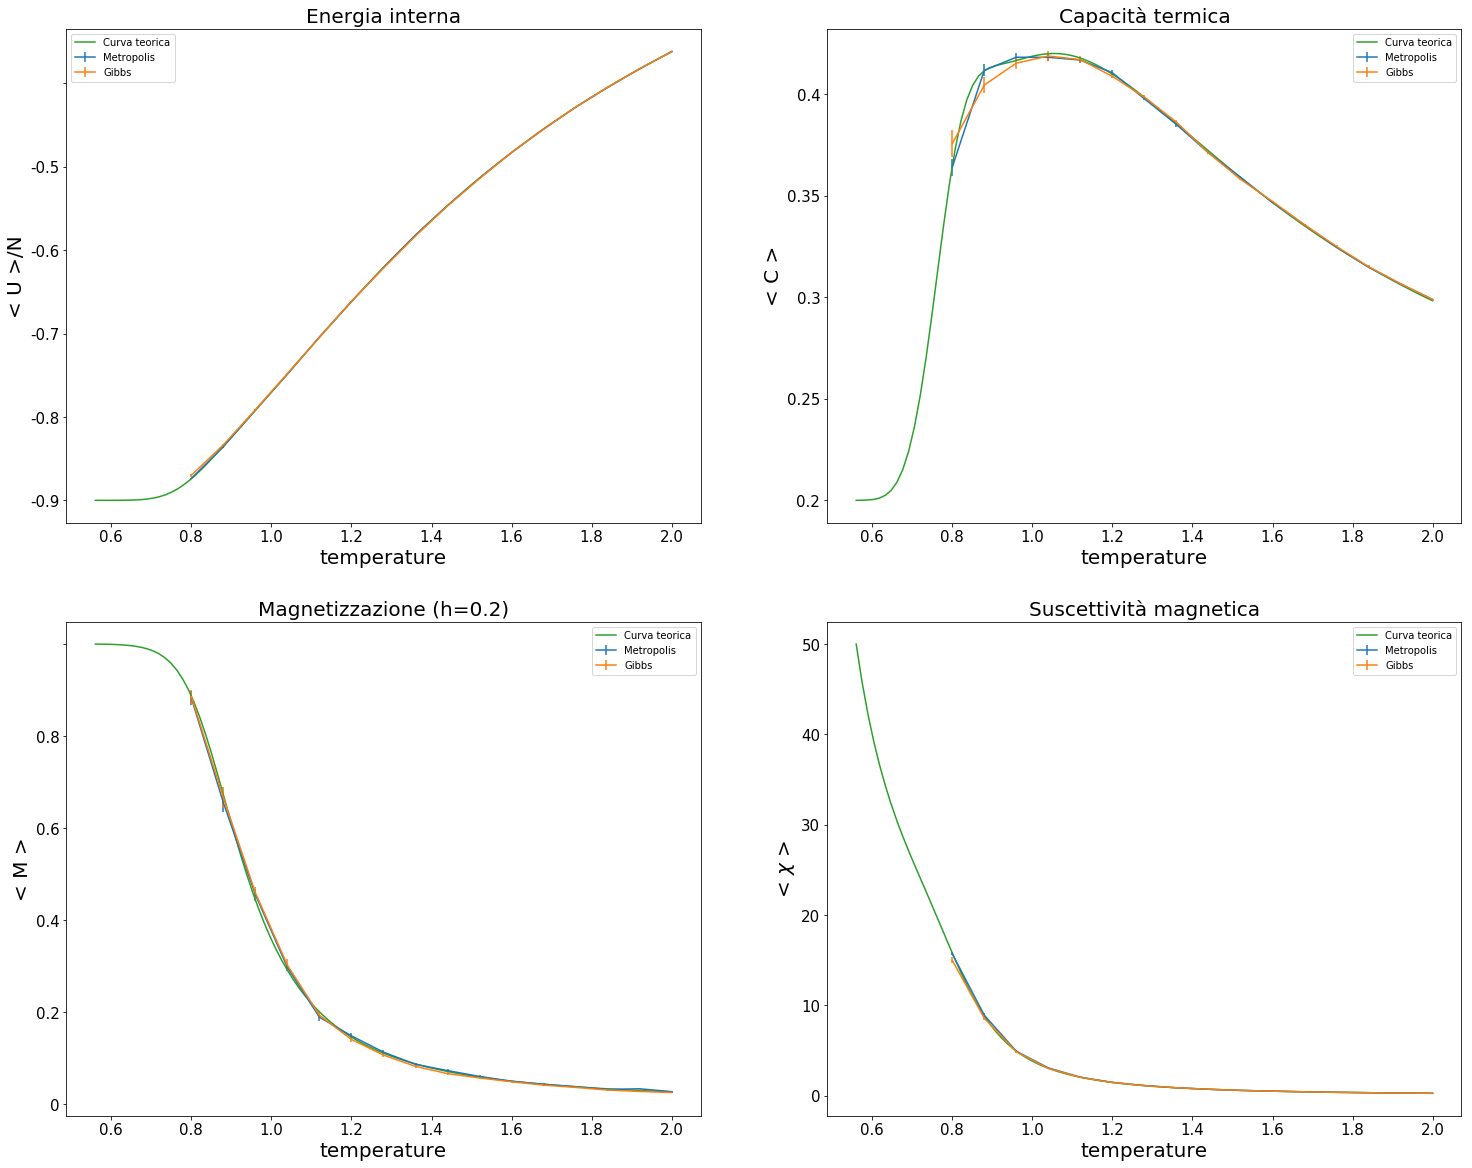

In [5]:
fig, axs = plt.subplots(2, 2, figsize = (25, 20))
#energia interna
axs[0,0].errorbar(temp,stima_eneM.iloc[:,0],yerr=stima_eneM.iloc[:,1]) 
axs[0,0].errorbar(temp,stima_eneG.iloc[:,0],yerr=stima_eneG.iloc[:,1]) 
axs[0,0].plot(T, e) 
axs[0,0].set_title('Energia interna', fontsize=20)
axs[0,0].set_xlabel(xlabel='temperature', fontsize=20)
axs[0,0].set_xticklabels(labels=[0,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0], fontsize=15)
axs[0,0].set_ylabel(ylabel='< U >/N', fontsize=20)
axs[0,0].set_yticklabels(labels=[-1.0,-0.9,-0.8,-0.7,-0.6,-0.5], fontsize=15)
axs[0,0].legend(['Curva teorica','Metropolis', 'Gibbs'])

#capacità termica
axs[0,1].errorbar(temp,stima_heatM.iloc[:,0],yerr=stima_heatM.iloc[:,1]) 
axs[0,1].errorbar(temp,stima_heatG.iloc[:,0],yerr=stima_heatG.iloc[:,1]) 
axs[0,1].plot(T, heat)
axs[0,1].set_title('Capacità termica', fontsize=20)
axs[0,1].set_xlabel(xlabel='temperature', fontsize=20)
axs[0,1].set_xticklabels(labels=[0,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0], fontsize=15)
axs[0,1].set_ylabel(ylabel='< C >', fontsize=20)
axs[0,1].set_yticklabels(labels=[0,0.20,0.25,0.30,0.35,0.40,0.45], fontsize=15)
axs[0,1].legend(['Curva teorica','Metropolis', 'Gibbs'])


#magnetizzazione
axs[1,0].errorbar(temp,stima_magM.iloc[:,0],yerr=stima_magM.iloc[:,1]) 
axs[1,0].errorbar(temp,stima_magG.iloc[:,0],yerr=stima_magG.iloc[:,1]) 
axs[1,0].plot(T, M)
axs[1,0].set_title('Magnetizzazione (h=0.2)', fontsize=20)
axs[1,0].set_xlabel(xlabel='temperature', fontsize=20)
axs[1,0].set_xticklabels(labels=[0,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0], fontsize=15)
axs[1,0].set_ylabel(ylabel='< M >', fontsize=20)
axs[1,0].set_yticklabels(labels=[0,0,0.2,0.4,0.6,0.8], fontsize=15)
axs[1,0].legend(['Curva teorica','Metropolis', 'Gibbs'])



#suscettività
axs[1,1].errorbar(temp,stima_suscM.iloc[:,0],yerr=stima_suscM.iloc[:,1]) 
axs[1,1].errorbar(temp,stima_suscG.iloc[:,0],yerr=stima_suscG.iloc[:,1]) 
axs[1,1].plot(T, X)
axs[1,1].set_title('Suscettività magnetica', fontsize=20)
axs[1,1].set_xlabel(xlabel='temperature', fontsize=20)
axs[1,1].set_xticklabels(labels=[0,0.6,0.8,1.0,1.2,1.4,1.6,1.8,2.0], fontsize=15)
axs[1,1].set_ylabel(ylabel='< $\chi$ >', fontsize=20)
axs[1,1].set_yticklabels(labels=[0,0,10,20,30,40,50, 60 ,70, 80], fontsize=15)
axs[1,1].legend(['Curva teorica','Metropolis', 'Gibbs'])

Notiamo che con entrambi i metodi abbiamo u ottimo accordo tra le simulazioni e le curve teoriche.